## Linear Regression sử dụng Gradient Descent cho hàm một biến
Ở đây ta sẽ load data từ file csv, [link file csv](https://drive.google.com/file/d/1DV8psMeg8w4FJfE76jwb4D1yxDocg138/view?usp=sharing)

Ta nhận thấy hàm f(x) sẽ có dạng như sau 
 + x, y đã biết
 + w = model parameter, là hệ số cần đi tìm minimum

Cost function của nó sẽ có dạng 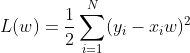

Hay ta có thể thấy nó là một norm-2, ghi lại được công thức như sau 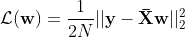

Mn có thể tham khảo đạo hàm cho hàm nhiều biến ở [link](https://machinelearningcoban.com/math/#-dao-ham-cua-ham-nhieu-bien). Vậy đạo hàm của cost function trên sẽ là 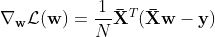

Ta tiến hành demo code bằng Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Solution found by Gradient Descent: w = [[0.20914819 1.4775381 ]]


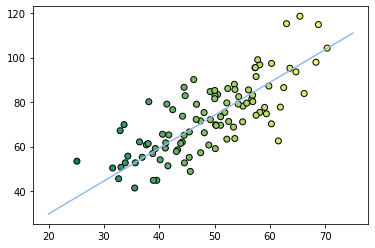

In [2]:
# load data từ file csv
df = pd.read_csv('../data/data_linear_regression.csv')
X = np.array([df.iloc[:, 0]]).T
y = np.array([df.iloc[:, 1]]).T

# chuẩn bị dữ liệu
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(5000):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new), 2)/len(w_new) < 1e-6:
            break 
        w.append(w_new)
    return (w, it) 

(w_optimal, it1) = myGD(np.array([[0], [0]]), grad, 0.0001)
w = w_optimal[-1]

plt.scatter(X, y, c=X, cmap='summer', edgecolors='black')
x_1 = np.linspace(20, 75, 3, endpoint = True)
y = w[0, 0] + w[1, 0]*x_1 
plt.plot(x_1, y, color='#94bbe9')

print(f'Solution found by Gradient Descent: w = {w.T}')

Ta chọn điểm **w_init** ban đầu là [0, 0] nên điểm optimal sẽ ra khác với khi giải bằng normal equation, nhưng nếu ta đặt điểm khởi tạo thành [10, 10] thì ta sẽ có đúng như kết quả khi giải normal equation hay sử dụng sklearn

Tùy theo cách tối ưu hóa model parameter (Gradient Descent, Normal Equation), cũng như chọn điểm **w_init**, mà kết quả **w** có thể ra khác nhau. Có thể thấy ở ví dụ sử dụng Normal Equation để giải quyết sẽ ra **w** khác với sử dụng Gradient Descent vì ta chọn điểm **w_init** là [0, 0]. Nhưng chung quy lại khi thế **x** vào để predict thì kết quả có thể xấp xỉ nhau, từ đó cách chọn hyper-parameter cũng ảnh hưởng tới chất lượng model